#  1. Prepare the environment

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
gpu_info = !nvidia-smi

In [23]:
import os
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print( f"Matplotlib {matplotlib.__version__}\n" )

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]

NumPy 1.23.5

Matplotlib 3.7.1

TensorFlow 2.14.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [4]:
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory where your images are stored (Change directory)
main_directory = "/content/drive/MyDrive/Deep_learning/raw_data_train"

# Initialize lists to store data
image_data = []
group_counts = {}

# Iterate through the main directory
for root, dirs, files in os.walk(main_directory):
    for directory in dirs:
        class_name = directory  # Use the subfolder name as the class
        subfolder_path = os.path.join(root, directory)
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".jpg") or filename.endswith(".jpg")or filename.endswith(".png"):  # Filter image files
                image_path = os.path.join(subfolder_path, filename)
                try:
                    img = Image.open(image_path)
                    # Get basic image information
                    image_size = img.size
                    image_type = img.mode  # Get the image mode (e.g., RGB, grayscale, etc.)
                    width, height = image_size
                    # Update group counts
                    if class_name in group_counts:
                        group_counts[class_name] += 1
                    else:
                        group_counts[class_name] = 1

                    # Append data to the list
                    image_data.append({'Image': filename, 'Class': class_name, 'Width': width, 'Height': height, 'Image Size': image_size, 'Type': image_type})
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")



# EDA

In [6]:
directory = "/content/drive/MyDrive/Deep_learning/raw_data_train/dirt"
files = os.listdir(directory)
# Create an empty dictionary to store the counts
counts = {}

# Loop through each file
for file in files:
    # Get the file extension
    ext = os.path.splitext(file)[1]
    # If the extension is not in the dictionary, add it with a count of 1
    if ext not in counts:
        counts[ext] = 1
    # If the extension is in the dictionary, increment the count by 1
    else:
        counts[ext] += 1

# Print the counts for each extension
for ext, count in counts.items():
    print("Number of files with extension", ext, ":", count)

Number of files with extension .jpg : 192
Number of files with extension .png : 8


In [7]:
# Convert the list to a DataFrame
df = pd.DataFrame(image_data)

'''
# Debugging - Print keys in image_data
for data in image_data:
    print(data.keys())
'''

# Create a dataframe summarizing the number of pictures in each class, each size, and each picture type
class_counts = df['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

size_counts = df.groupby(['Width', 'Height']).size().reset_index(name='Count')

type_counts = df['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']


# Print the dataframes
print("Class Counts:")
print(class_counts)

print("\nSize Counts:")
print(size_counts)

print("\nType Counts:")
print(type_counts)



Class Counts:
       Class  Count
0  adventure    200
1    cruiser    200
2       dirt    200
3      sport    200

Size Counts:
     Width  Height  Count
0      280     250      1
1      300     168      1
2      302     276      1
3      320     180      1
4      348     239      1
..     ...     ...    ...
450   5729    3821      1
451   6720    4480      1
452   7008    4672      1
453   7216    5412      1
454   7540    4241      1

[455 rows x 3 columns]

Type Counts:
   Type  Count
0   RGB    752
1  RGBA     38
2     P      8
3  CMYK      2


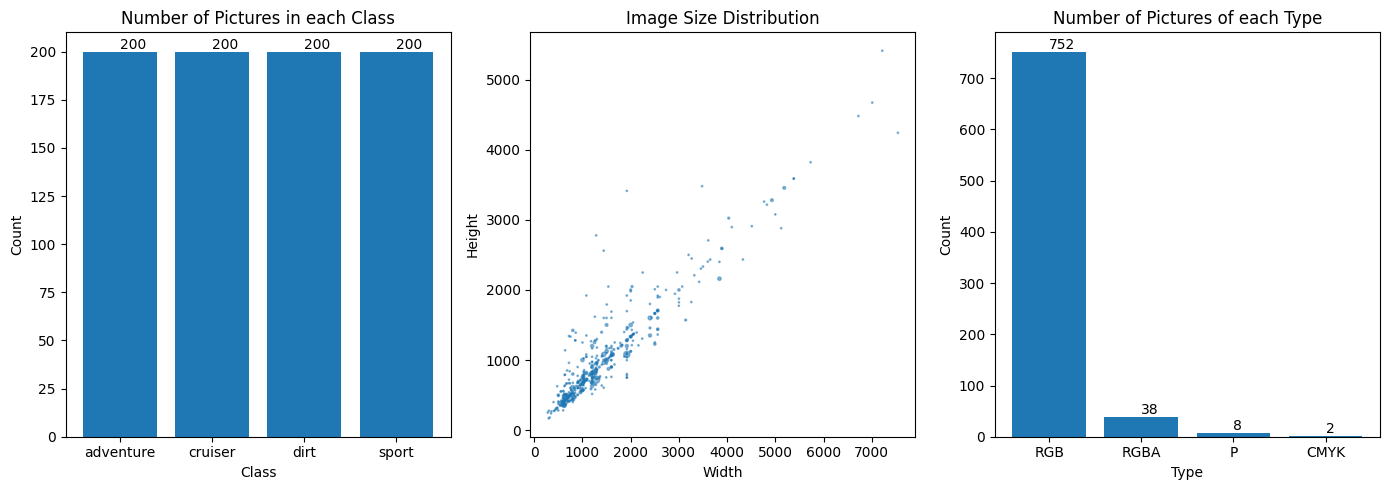

In [8]:
# Creating a single subplot for all three graphs
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

# Plotting the first graph for Class Counts
bars = axs[0].bar(class_counts['Class'], class_counts['Count'])
axs[0].set_title('Number of Pictures in each Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=0)
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar

# Plotting the second graph for Size Counts
axs[1].scatter(size_counts['Width'], size_counts['Height'], s=size_counts['Count'], alpha=0.5)
axs[1].set_title('Image Size Distribution')
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Height')

# Plotting the third graph for Type Counts
bars = axs[2].bar(type_counts['Type'], type_counts['Count'])
axs[2].set_title('Number of Pictures of each Type')
axs[2].set_xlabel('Type')
axs[2].set_ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar

plt.tight_layout()
plt.show()



In [9]:
# Print the DataFrame
print(df)

                                                 Image      Class  Width  \
0               KTM-1290-Super-Adventure-R-644x430.jpg  adventure    644   
1                                    download (53).jpg  adventure   1065   
2                         africa-twin-2-1635391943.jpg  adventure   1200   
3    DSC08710-Edit-2_ccc331b8-1805-460a-9d2f-fac333...  adventure   1500   
4    000000200596_09d47a34_95b6_486d_b773_4e7126a6a...  adventure   1000   
..                                                 ...        ...    ...   
795  Honda_CBR250_Four_in_the_Honda_Collection_Hall...      sport   1200   
796                                       IMG_0704.jpg      sport   1280   
797                                       IMG_0705.jpg      sport    830   
798                                       IMG_0714.jpg      sport    554   
799                                       IMG_0716.jpg      sport    678   

     Height    Image Size Type  
0       430    (644, 430)  RGB  
1       599   (1065, 

In [10]:
filtered_df = df[(df['Width'] <= 500) & (df['Height'] <= 500)].reset_index()
filtered_df

index                                              Image      Class  \
0      12                                  download (21).jpg  adventure   
1      14                 KTM-390-Adventure-SW-1-464x309.jpg  adventure   
2      43                                   bmw-g-310-gs.jpg  adventure   
3      52                                  download (19).jpg  adventure   
4     108                                  download (16).jpg  adventure   
5     116                                  download (20).jpg  adventure   
6     118                                  download (14).jpg  adventure   
7     120              suzuki-v-strom-1000-5f1867c5a249a.jpg  adventure   
8     162       f56fe1d5eade44b087ee48fd9a374b00_678x380.jpg  adventure   
9     168               ea23465d4774e9f56668a049556a9cfc.jpg  adventure   
10    177                    bmw-r-1250-gs-609161c7b8c7c.jpg  adventure   
11    195                                     download89.jpg  adventure   
12    378  blue-classic-chopper-motorcycle-3d-model-max-o...    cruiser   
13    399                                   download (3).jpg    cruiser   
14    409                            250RX-FeaturedImage.jpg       dirt   
15    442                        Kawasaki-KX450F_480x480.jpg       dirt   
16    518  brand-new-450cc-dirt-bike-300cc-motocross-endu...       dirt   
17    635        custom-ducati-racing-motorcycle-420x280.jpg      sport   
18    651  motorcycle-racing-superbike-racing-racing-moto...      sport   
19    753                                         s-l400.jpg      sport   
20    755                                   download (8).jpg      sport   

    Width  Height  Image Size Type  
0     280     250  (280, 250)  RGB  
1     464     309  (464, 309)  RGB  
2     302     276  (302, 276)  RGB  
3     450     300  (450, 300)  RGB  
4     500     500  (500, 500)  RGB  
5     357     268  (357, 268)  RGB  
6     464     309  (464, 309)  RGB  
7     320     180  (320, 180)  RGB  
8     499     280  (499, 280)  RGB  
9     500     375  (500, 375)  RGB  
10    414     274  (414, 274)  RGB  
11    464     309  (464, 309)  RGB  
12    500     500  (500, 500)  RGB  
13    300     168  (300, 168)  RGB  
14    500     500  (500, 500)  RGB  
15    480     320  (480, 320)  RGB  
16    500     407  (500, 407)  RGB  
17    420     280  (420, 280)  RGB  
18    348     239  (348, 239)    P  
19    400     400  (400, 400)  RGB  
20    500     490  (500, 490)  RGB

In [11]:
filtered_class_counts = filtered_df['Class'].value_counts().reset_index(name='Count')
class_counts.columns = ['Class', 'Count']
class_counts

Class  Count
0  adventure    200
1    cruiser    200
2       dirt    200
3      sport    200

In [12]:
filtered_size_counts = filtered_df.groupby(['Width', 'Height']).size().reset_index(name='Count')
filtered_size_counts

Width  Height  Count
0     280     250      1
1     300     168      1
2     302     276      1
3     320     180      1
4     348     239      1
5     357     268      1
6     400     400      1
7     414     274      1
8     420     280      1
9     450     300      1
10    464     309      3
11    480     320      1
12    499     280      1
13    500     375      1
14    500     407      1
15    500     490      1
16    500     500      3

In [13]:
filtered_type_counts = filtered_df['Type'].value_counts().reset_index(name='Count')
type_counts.columns = ['Type', 'Count']
filtered_type_counts

index  Count
0   RGB     20
1     P      1

In [14]:
'''
# Creating a single subplot for all three graphs
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

# Plotting the first graph for Class Counts
bars = axs[0].bar(class_counts['Class'], class_counts['Count'])
axs[0].set_title('Number of Pictures in each Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=0)
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar

# Plotting the second graph for Size Counts
axs[1].scatter(filtered_size_counts['Width'], filtered_size_counts['Height'], s=filtered_size_counts['Count'], alpha=0.5)
axs[1].set_title('Image Size Distribution')
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Height')

# Plotting the third graph for Type Counts
bars = axs[2].bar(filtered_type_counts['Type'], filtered_type_counts['Count'])
axs[2].set_title('Number of Pictures of each Type')
axs[2].set_xlabel('Type')
axs[2].set_ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar

plt.tight_layout()
plt.show()
'''


"\n# Creating a single subplot for all three graphs\nfig, axs = plt.subplots(1, 3, figsize=(14, 5))\n\n# Plotting the first graph for Class Counts\nbars = axs[0].bar(class_counts['Class'], class_counts['Count'])\naxs[0].set_title('Number of Pictures in each Class')\naxs[0].set_xlabel('Class')\naxs[0].set_ylabel('Count')\naxs[0].tick_params(axis='x', rotation=0)\nfor bar in bars:\n    yval = bar.get_height()\n    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar\n\n# Plotting the second graph for Size Counts\naxs[1].scatter(filtered_size_counts['Width'], filtered_size_counts['Height'], s=filtered_size_counts['Count'], alpha=0.5)\naxs[1].set_title('Image Size Distribution')\naxs[1].set_xlabel('Width')\naxs[1].set_ylabel('Height')\n\n# Plotting the third graph for Type Counts\nbars = axs[2].bar(filtered_type_counts['Type'], filtered_type_counts['Count'])\naxs[2].set_title('Number of Pictures of each Type')\naxs[2].set_xlabel('Type')

# Pre-Processing data

In [17]:
model_input_h = input('image size :',)
train_batch_size = input('batch size :', )
if model_input_h == '':
    model_input_w = 224
    model_input_h = 224
else:
    model_input_h = int(model_input_h)
    model_input_w = model_input_h


if train_batch_size == '':
    train_batch_size = 100
else:
    train_batch_size = int(train_batch_size)

print(f'image size :{model_input_w}x{model_input_h}')
print('batch size :', train_batch_size)

image size :
batch size :40
image size :224x224
batch size : 40


# Read data

In [24]:
def read_infer_label(path, subset, size= (300,300), batch_size= 2):
    # directory = './resize/'
    # directory = './raw_data/'
    tf_raw_data = tf.keras.utils.image_dataset_from_directory(
        path,
        labels='inferred',
        # label_mode= 'categorical',#'categorical',
        label_mode= 'int',#'categorical',
        class_names=None,
        color_mode='rgb',
        batch_size=batch_size,
        image_size=size,
        shuffle=True,
        seed=42,
        validation_split=0.2,
        subset=subset,
        interpolation='bilinear',
        follow_links=False,
        crop_to_aspect_ratio=False
    )
    return tf_raw_data

In [25]:
raw_train = read_infer_label("/content/drive/MyDrive/Deep_learning/raw_data_train",'training', size= (model_input_w, model_input_h), batch_size= train_batch_size)
raw_test = read_infer_label("/content/drive/MyDrive/Deep_learning/raw_data_train",'validation', size= (model_input_w, model_input_h), batch_size= train_batch_size)

Found 800 files belonging to 4 classes.
Using 640 files for training.
Found 800 files belonging to 4 classes.
Using 160 files for validation.


In [26]:
data_directory = "/content/drive/MyDrive/Deep_learning/raw_data_train"

# Initialize an empty dictionary to store the counts for each class
class_counts = {}
class_names = []
# Iterate over the subdirectories in the main data directory
for class_name in os.listdir(data_directory):
    class_path = os.path.join(data_directory, class_name)
    if os.path.isdir(class_path):
        class_count = len(os.listdir(class_path))
        class_counts[class_name] = class_count

# Display the counts for each class
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")
    class_names.append(class_name)
print(class_names)

Class: adventure, Count: 200
Class: cruiser, Count: 200
Class: dirt, Count: 200
Class: sport, Count: 200
['adventure', 'cruiser', 'dirt', 'sport']


## Data Augmentation

In [ ]:
dataaug = tf.keras.models.Sequential( [
                                          tf.keras.Input(shape=(model_input_w, model_input_h,3)),
                                        #   tf.keras.layers.RandomFlip(mode='horizontal_and_vertical', name='rand_flip'),
                                          tf.keras.layers.RandomFlip(mode='horizontal', name='rand_flip'),
                                          tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode='reflect', name='rand_trans'),
                                          tf.keras.layers.RandomRotation(factor=0.2, fill_mode='nearest', name='rand_rot'),
                                          tf.keras.layers.RandomCrop(model_input_w, model_input_h, seed=42, name= 'rans_crop')
                                      ],
                                     name='dataaug' )

dataaug.summary()

In [ ]:
def apply_pipeline(image, label):
    return dataaug(image), label

# Apply the sequential pipeline to the dataset
augmented_data = raw_train.map(apply_pipeline)

# Iterate over the dataset and display the augmented images

plt.figure(figsize=(15,16))
for image, label in augmented_data:
  for i in range (25):
    plt.subplot(5, 5, i + 1).set_title(f"class no. {label[i]}: {class_names[int(label[i])]}" )
    plt.imshow(image[i] / 255)
  plt.show()
  break


In [ ]:
a = augmented_data.as_numpy_iterator()
plt.imshow(a.next()[0][0] / 255)
plt.title(f"class no. {label[i]}: {class_names[int(label[i])]}" )
plt.show()
print(a.next()[1][0])

## Concat Raw and Augemented data

In [ ]:
full_train = raw_train.concatenate(augmented_data)

## Scaling

In [ ]:
scaling_layers = [
    tf.keras.Input(shape= (model_input_w, model_input_h)),
    tf.keras.layers.Rescaling(1./255)

]

data_scaling = tf.keras.models.Sequential(
    scaling_layers,
    name= 'data_scaling'
)

data_scaling.summary()


In [ ]:
scaling_bool = True

In [ ]:
if scaling_bool == True:
    # Define a function to apply the sequential pipeline to the data
    def apply_scaling(image, label):
        return data_scaling(image), label

    # Apply the sequential pipeline to the dataset
    full_train_prep = full_train.map(apply_scaling)

    ## Iterate over the dataset and display the augmented images
    # c = 0
    # for images, labels in full_train_prep:
    #     for i in range(len(images)):
    #         plt.imshow(images[i])  # Assuming the images are in the range [0, 255]
    #         plt.title(f"Label: {labels[i]}")
    #         plt.show()
    #         # c+=1
    #         continue
    #         # if c > 10:
    #         #     break
    #         # break
    #     # end
    #     break
else:
    full_train_prep = full_train



## Data Details

In [ ]:
batch = full_train_prep.as_numpy_iterator().next()
print('total data :', len(batch[0]) * len(full_train_prep))
print('N batch :', len(batch))
print('data shape :',batch[0][0].shape)
print('label example : ',batch[1][0])

# Get pre-trained model

In [ ]:
vgg = tf.keras.applications.vgg16.VGG16(weights = "imagenet", include_top=True)

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Use the pretrained model

In [ ]:
# Load an image as PIL.Image.Image
img_path = '/content/drive/MyDrive/Deep_learning/raw_data_test/sport/5-best-supersport-motorcycles-under-13000_23.jpg'
img =  tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
print( f"type(img) = {type(img)}" )

# Convert PIL Image to NumPy ndarray
x = tf.keras.preprocessing.image.img_to_array(img)
print( f"type(x) = {type(x)} , x.dtype = {x.dtype} , x.shape = {x.shape} , min(x) = {np.min(x)} , max(x) = {np.max(x)}" )

# Display the NumPy image
plt.imshow( x.astype(np.uint8) )
plt.show()

In [ ]:
x = tf.keras.applications.vgg16.preprocess_input(x)

print( f"type(x) = {type(x)} , x.dtype = {x.dtype} , x.shape = {x.shape} , min(x) = {np.min(x):.4f} , max(x) = {np.max(x):.4f}" )

In [ ]:
# Use the model to predict this image
pred = vgg.predict(np.expand_dims(x, axis=0) )
# Decode the top 10 classes
predictions = tf.keras.applications.vgg16.decode_predictions(pred, top=10)[0]
for i, prediction in enumerate(predictions):
  print( f"Rank {i+1}: {prediction}" )

#VGG-**16** Model

# Prepare for transfer learning and finetuning


In [ ]:
vgg_extractor = tf.keras.applications.vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (model_input_w, model_input_h, 3))

vgg_extractor.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Iterate over all layers in the model
for i,layer in enumerate(vgg_extractor.layers):
    print( f"Layer {i}: name = {layer.name} , trainable = {layer.trainable}" )

Layer 0: name = input_5 , trainable = True
Layer 1: name = block1_conv1 , trainable = True
Layer 2: name = block1_conv2 , trainable = True
Layer 3: name = block1_pool , trainable = True
Layer 4: name = block2_conv1 , trainable = True
Layer 5: name = block2_conv2 , trainable = True
Layer 6: name = block2_pool , trainable = True
Layer 7: name = block3_conv1 , trainable = True
Layer 8: name = block3_conv2 , trainable = True
Layer 9: name = block3_conv3 , trainable = True
Layer 10: name = block3_pool , trainable = True
Layer 11: name = block4_conv1 , trainable = True
Layer 12: name = block4_conv2 , trainable = True
Layer 13: name = block4_conv3 , trainable = True
Layer 14: name = block4_pool , trainable = True
Layer 15: name = block5_conv1 , trainable = True
Layer 16: name = block5_conv2 , trainable = True
Layer 17: name = block5_conv3 , trainable = True
Layer 18: name = block5_pool , trainable = True


### Freeze layers

In [ ]:
# Recursively freeze all layers in the model
vgg_extractor.trainable = False

for i,layer in enumerate(vgg_extractor.layers):
    print( f"Layer {i}: name = {layer.name} , trainable = {layer.trainable}" )

Layer 0: name = input_5 , trainable = False
Layer 1: name = block1_conv1 , trainable = False
Layer 2: name = block1_conv2 , trainable = False
Layer 3: name = block1_pool , trainable = False
Layer 4: name = block2_conv1 , trainable = False
Layer 5: name = block2_conv2 , trainable = False
Layer 6: name = block2_pool , trainable = False
Layer 7: name = block3_conv1 , trainable = False
Layer 8: name = block3_conv2 , trainable = False
Layer 9: name = block3_conv3 , trainable = False
Layer 10: name = block3_pool , trainable = False
Layer 11: name = block4_conv1 , trainable = False
Layer 12: name = block4_conv2 , trainable = False
Layer 13: name = block4_conv3 , trainable = False
Layer 14: name = block4_pool , trainable = False
Layer 15: name = block5_conv1 , trainable = False
Layer 16: name = block5_conv2 , trainable = False
Layer 17: name = block5_conv3 , trainable = False
Layer 18: name = block5_pool , trainable = False


In [ ]:
x = vgg_extractor.output

# Add our custom layer(s) to the end of the existing model
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
new_outputs = tf.keras.layers.Dense(4, activation="softmax")(x)

# Construct the main model
model = tf.keras.models.Model(inputs=vgg_extractor.inputs, outputs=new_outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

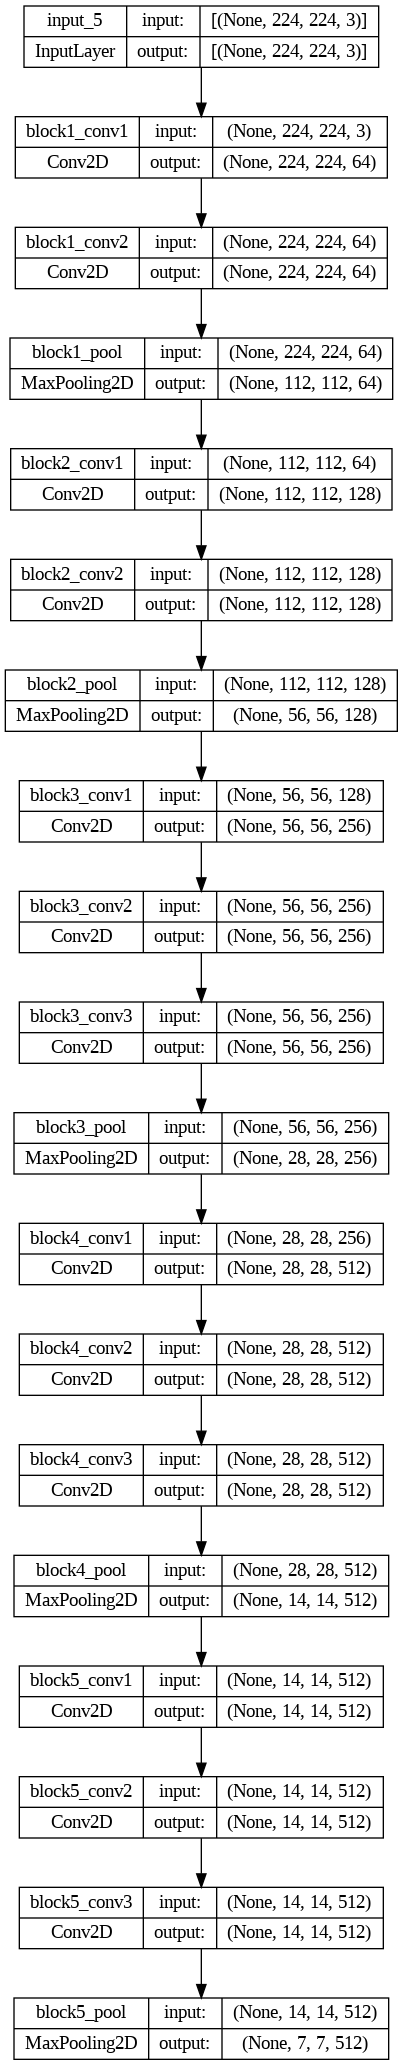

In [ ]:
tf.keras.utils.plot_model(vgg_extractor, to_file = 'VGG16_Model.png', show_shapes = True, show_dtype = False, show_layer_names = True, dpi = 96)

In [ ]:
model.compile( loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"] )

history = model.fit( full_train, epochs=100, verbose=1, validation_data=raw_test)


Epoch 1/100
32/32 [==============================] - 41s 953ms/step - loss: 10.4126 - acc: 0.3750 - val_loss: 1.6083 - val_acc: 0.3375
Epoch 2/100
32/32 [==============================] - 38s 1s/step - loss: 1.5400 - acc: 0.3414 - val_loss: 1.0208 - val_acc: 0.5875
Epoch 3/100
32/32 [==============================] - 44s 1s/step - loss: 1.2331 - acc: 0.4430 - val_loss: 0.8292 - val_acc: 0.6687
Epoch 4/100
32/32 [==============================] - 45s 1s/step - loss: 1.0908 - acc: 0.4805 - val_loss: 0.5788 - val_acc: 0.8000
Epoch 5/100
32/32 [==============================] - 41s 1s/step - loss: 1.1125 - acc: 0.4766 - val_loss: 0.8174 - val_acc: 0.7250
Epoch 6/100
32/32 [==============================] - 39s 1s/step - loss: 1.1104 - acc: 0.5047 - val_loss: 0.7918 - val_acc: 0.6687
Epoch 7/100
32/32 [==============================] - 37s 993ms/step - loss: 1.0285 - acc: 0.5359 - val_loss: 0.5529 - val_acc: 0.8000
Epoch 8/100
32/32 [==============================] - 38s 983ms/step - loss: 

In [ ]:
history.history.keys()

{}

Plot Accuracy and Loss

In [27]:
# Assuming 'transfer_model' is the trained model
history = model.history.history

# Retrieve the training and validation loss and accuracy
train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['acc']
val_acc = history['val_acc']

# Create a plot for training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Create a plot for training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Display the plots
plt.show()


NameError: ignored

# Evaluate

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

4/4 [==============================] - 4s 191ms/step


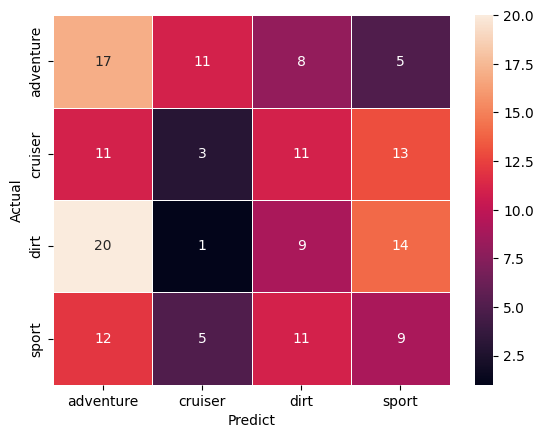

In [ ]:
def plot_cunfusion_metrix(images, labels, predictions=None):
  y_pred = []
  y_test = []
  for i, (image, label) in enumerate(zip(images, labels)):
    y_label = class_names[int(label)]
    y_test.append(y_label)
    pred = class_names[int(np.argmax(predictions[i]))]
    y_pred.append(pred)
  cm = confusion_matrix(y_test, y_pred,)
  ax = sns.heatmap(cm, annot = True, xticklabels = class_names, yticklabels = class_names, linewidth=.5, )
  ax.set(xlabel='Predict',ylabel='Actual')
  plt.show()

# Convert the test data to numpy arrays
test_images = np.array([data[0].numpy() for data in raw_test.unbatch()])
test_labels = np.array([data[1].numpy() for data in raw_test.unbatch()])

# Generate predictions on the test images
predictions = model.predict(raw_test)

# Plot a sample of the test images with their true and predicted labels
plot_cunfusion_metrix(test_images, test_labels, predictions)

In [ ]:
def read_test_data(path, size= (244,244), batch_size= 2):
    tf_raw_data = tf.keras.utils.image_dataset_from_directory(
        path,
        labels='inferred',
        label_mode= 'int',
        class_names=None,
        color_mode='rgb',
        batch_size=batch_size,
        image_size=size,
        shuffle=True,
        seed=42,
        validation_split= None,
        subset= None,
        interpolation='bilinear',
        follow_links=False,
        crop_to_aspect_ratio=False
    )
    return tf_raw_data

#Prediction with Test image dataset

In [ ]:
test_data = read_test_data('/content/drive/MyDrive/Deep_learning/raw_data_test', size= (model_input_w, model_input_h), batch_size= train_batch_size)

Found 200 files belonging to 4 classes.


In [ ]:
loss, acc = model.evaluate(test_data)
print('loss :', loss)
print('acc :', acc)


5/5 [==============================] - 4s 184ms/step - loss: 0.6158 - acc: 0.8800
loss : 0.615782618522644
acc : 0.8799999952316284


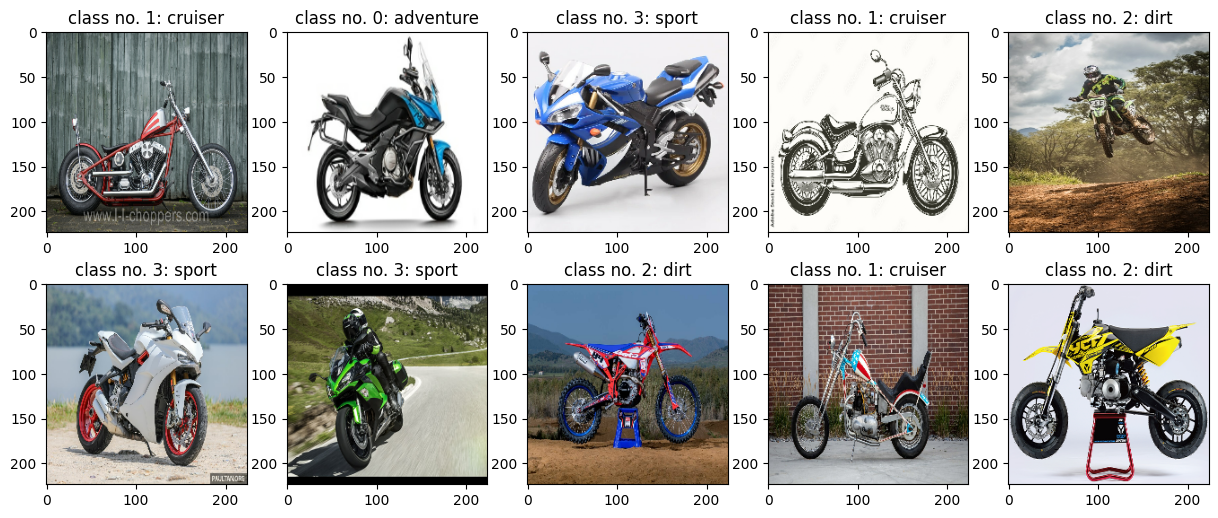

In [ ]:
plt.figure(figsize=(15,6))
for images, labels in test_data:
  for  i in range(10):
    plt.subplot(2,5,i+1).set_title( f"class no. {labels[i]}: {class_names[int(labels[i])]}" )
    plt.imshow(images[i] / 255)

  plt.show()
  break

5/5 [==============================] - 5s 184ms/step


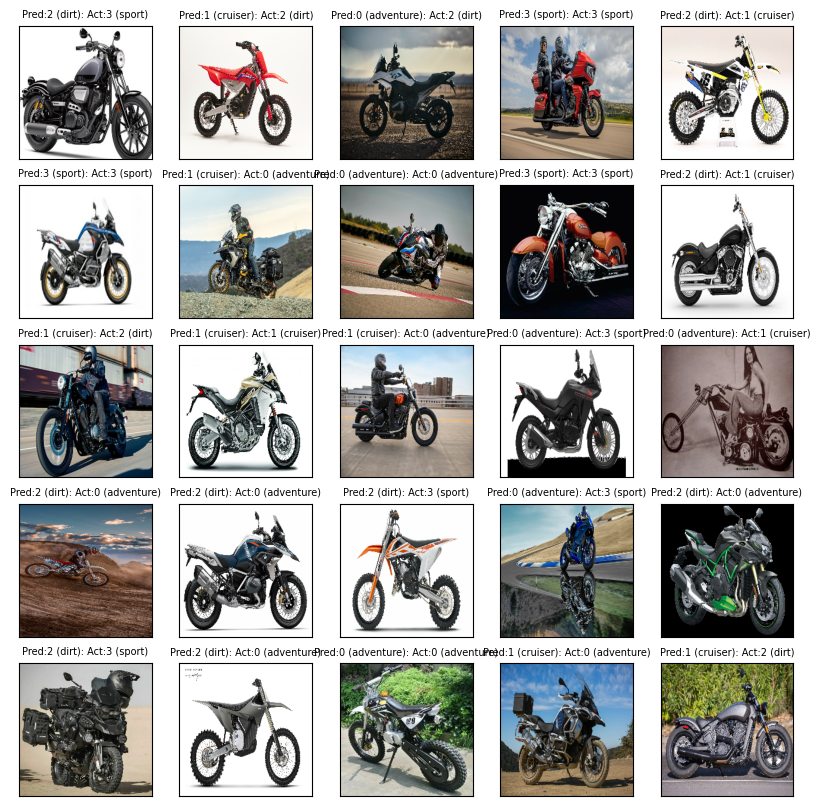

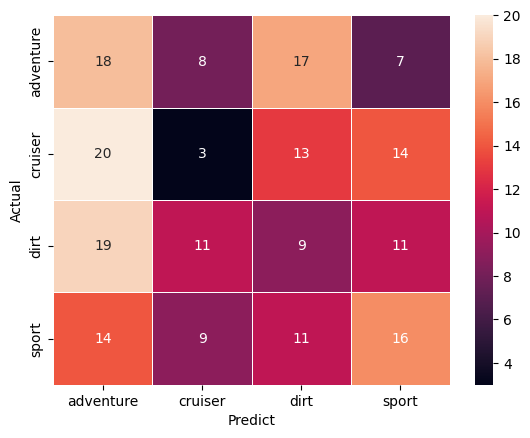

In [ ]:
# Function to display a sample of images along with their predicted labels
def plot_sample_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(zip(images, labels)):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image / 255.0)

        if predictions is not None:
          pred = np.argmax(predictions[i])
          pred_label = class_names[int(pred)]

          true_label = class_names[int(label)]
          plt.title(f"Pred:{pred} ({pred_label}): Act:{label} ({true_label})",
                       fontsize= 7)
        else:
            true_label = np.argmax(label)
            plt.title(f"Act:{i} ({true_label})", fontsize= 7)
    plt.show()

# Convert the test data to numpy arrays
test_images = np.array([data[0].numpy() for data in test_data.unbatch()])
test_labels = np.array([data[1].numpy() for data in test_data.unbatch()])

# Generate predictions on the test images
predictions = model.predict(test_data)

plot_sample_images(test_images[:25], test_labels[:25], predictions[:25])

plot_cunfusion_metrix(test_images, test_labels, predictions)

In [ ]:
# Function to display a sample of images along with their predicted labels
def plot_sample_images(images, labels, predictions=None):
    global num_plot
    global label_lst
    plt.figure(figsize=(15, 15))
    for i, (image, label) in enumerate(zip(images, labels)):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image / 255.0)
        if predictions is not None:
            predicted_label = np.argmax(predictions[i])
            true_label = label_lst[label]
            print('pred :', predicted_label, 'true :', true_label)
            plt.xlabel(f"Pred: {label_lst[predicted_label]} (True: {true_label})",
                       fontsize= 6)
        else:
            true_label = np.argmax(label)
            plt.xlabel(f"True: {label_lst[true_label]}",fontsize= 6)
    plt.show()

# Convert the test data to numpy arrays
test_images = np.array([data[0].numpy() for data in raw_test.unbatch()])
test_labels = np.array([data[1].numpy() for data in raw_test.unbatch()])

# Generate predictions on the test images
predictions = model.predict(raw_test)

# Plot a sample of the test images with their true and predicted labels
#num_plot = 50
plot_sample_images(test_images[:25], test_labels[:25], predictions[:25])
# plot_sample_images(test_images[:num_plot], test_labels[:num_plot], predictions[:num_plot])

## Grad-CAM

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = tf.keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
last_conv_layer_name = 'conv5_block3_out'
img_path = '/content/drive/MyDrive/Deep_learning/raw_data_test/cruiser/1970s-chopper-generator-shovelhead-motor.jpg'
#img_path = './raw_data_test/cruiser/rocket-front.jpg'
img_array = get_img_array(img_path, (224,224))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None)

ValueError: ignored

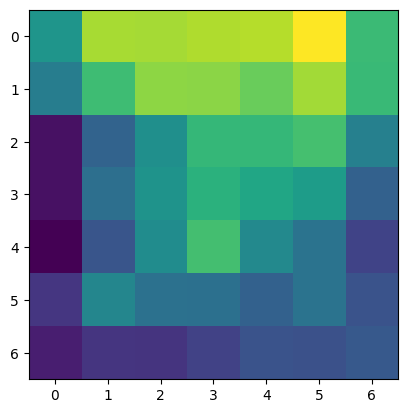

In [ ]:
plt.imshow(heatmap)

C:\Users\kimte\AppData\Local\Temp\ipykernel_16180\4131525126.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


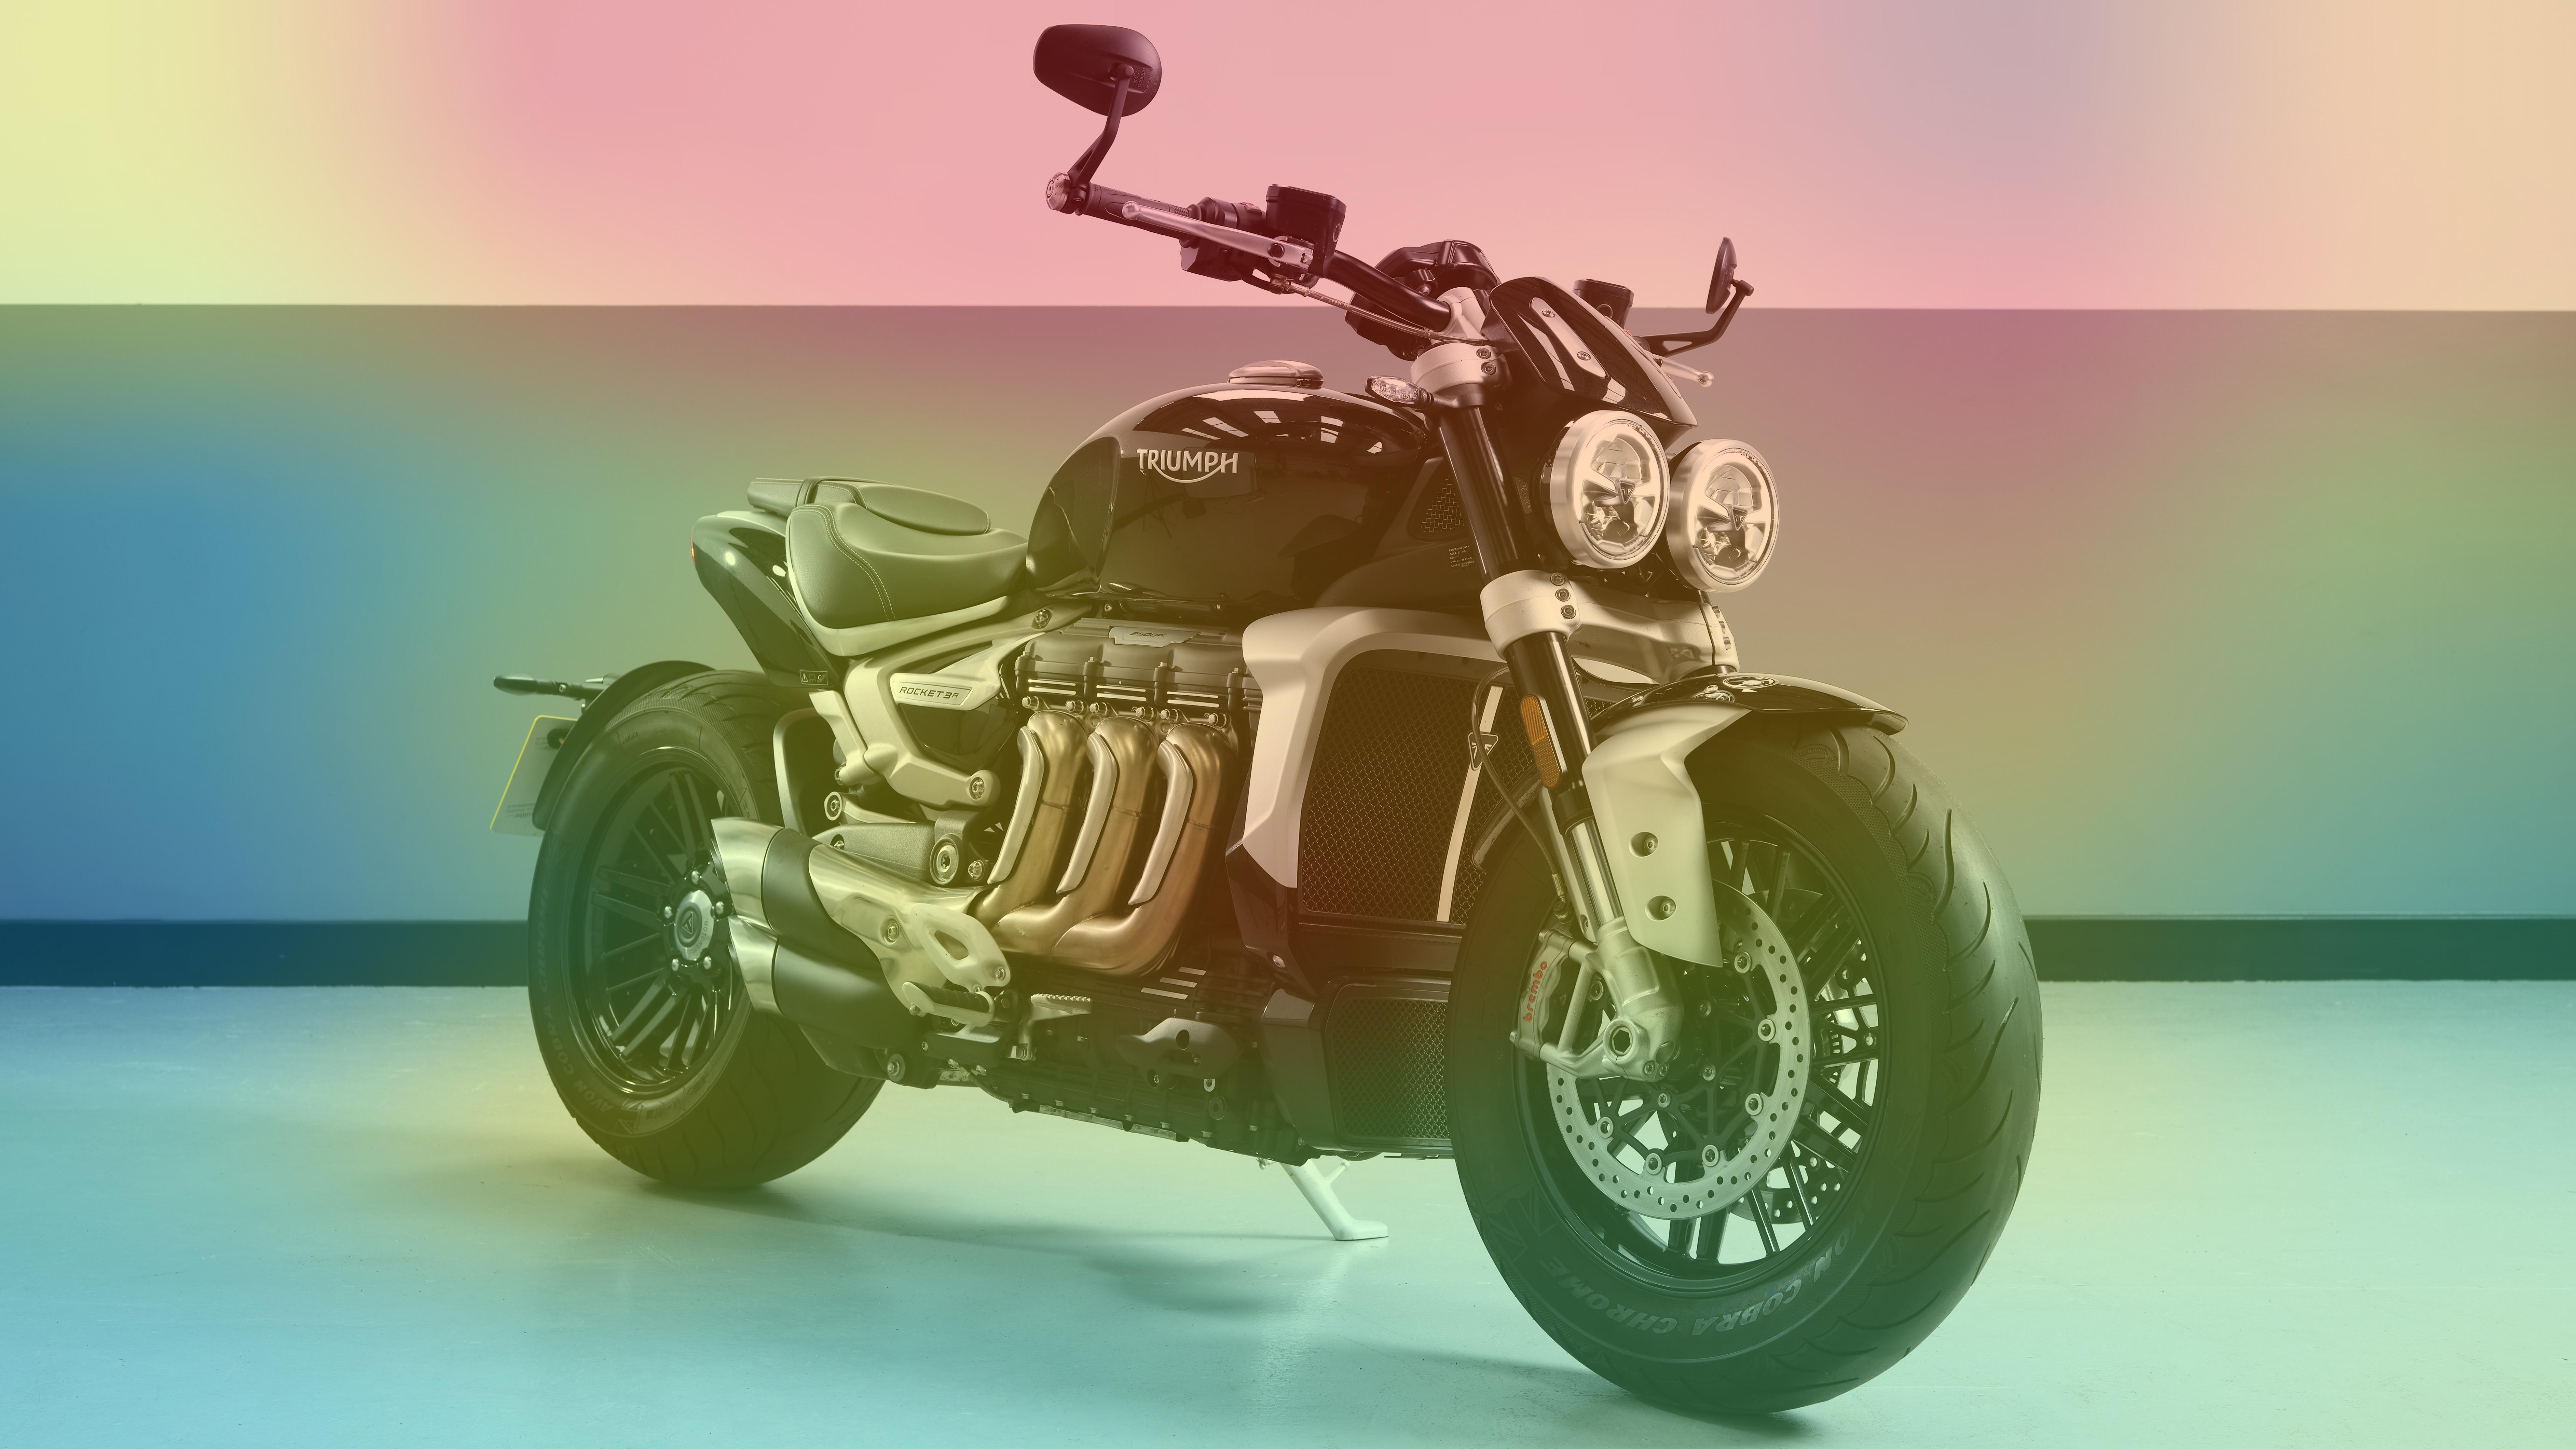

In [ ]:
import matplotlib.cm as cm
from IPython.display import Image, display
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)#, cam_path= )

#### Autotune (caching??)

In [ ]:
tf.data.AUTOTUNE

-1

#### test rouding

In [ ]:
print(f'{i:.6f}')

9.000000


In [ ]:
for i in transfer_model.predict(raw_test)[1]:
    print(f'{i:.6f}')

0.002387
0.981088
0.016520
0.000004


## Train with callback method

In [ ]:
from tensorflow.keras.callbacks import Callback

class MaxAccuracyEpochScoreSaver(Callback):
    def __init__(self):
        super(MaxAccuracyEpochScoreSaver, self).__init__()
        self.max_val_accuracy = 0.0
        self.max_val_epoch = 0
        self.scores = {}

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs['val_accuracy']
        if current_val_accuracy > self.max_val_accuracy:
            self.max_val_accuracy = current_val_accuracy
            self.max_val_epoch = epoch + 1
            self.scores = {
                'Epoch': self.max_val_epoch,
                'Training Loss': logs['loss'],
                'Training Accuracy': logs['accuracy'],
                'Validation Loss': logs['val_loss'],
                'Validation Accuracy': logs['val_accuracy']
            }

    def on_train_end(self, logs=None):
        print("Max Accuracy Epoch Scores:")
        for key, value in self.scores.items():
            print(f"{key}: {value}")




In [ ]:
model.compile(optimizer= 'adam',
                     loss= 'sparse_categorical_crossentropy',
                     metrics= ['accuracy'])

In [ ]:
# Create an instance of the callback
max_accuracy_saver = MaxAccuracyEpochScoreSaver()

# Add the callback to the list of callbacks when fitting the model
# transfer_model.fit(full_train_prep, epochs=2, validation_data=raw_test, callbacks=[max_accuracy_saver])
model.fit(full_train, epochs=200, validation_data=raw_test, callbacks=[max_accuracy_saver])

In [ ]:
# transfer_model.fit(full_train_prep, epochs= 2)#, validation_data= raw_test)

#Evaluate the model on test set

In [ ]:
# Evaluate the trained model on the test set
results = model.evaluate(x_test_vgg, y_test, batch_size=128)
print( f"{model.metrics_names}: {results}" )

In [ ]:
# Test using the model on many images

# Get a batch of samples
n = 20
samples = x_test_vgg[:n]
print(f'{samples.shape=}')

# Predict a batch of samples
y_pred = model.predict(samples)

# Interpret the results
for i in range(n):
  plt.figure(figsize=(3,3), dpi=90)
  ax = plt.gca()
  plt.imshow( x_test[i] )
  plt.title( f"x_test[{i}]: true={y_test[i][0]}({cifar10_labels[int(y_test[i])]}) , pred={np.argmax(y_pred[i])}({cifar10_labels[np.argmax(y_pred[i])]})" )
  color_frame(ax, y_test[i], np.argmax(y_pred[i]))
  plt.show()